# LOG6302A — Analyse d’applications et Cyber-sécurité<br>Laboratoire #3

**Quentin Guidée (2206809), Nam Vu (2230468)**

Polytechnique Montréal – Hiver 2024


In [1]:
import tempfile
from copy import deepcopy

from code_analysis import CFG, CFGReader, Graph
from graphviz import Source
from IPython.display import Image
from ptfa import DefinitelyReachablePTFA, DefinitelyReachingPTFA, PatternCheck

%load_ext pyinstrument

cfg_reader = CFGReader()


def show_graph(graph: Graph):
    """Utilitaire pour afficher les graphes dans Jupyter"""
    dot = graph.to_dot()
    s = Source(dot)
    with tempfile.NamedTemporaryFile(suffix=".png") as f:
        s.render(f.name, format="png")
        display(Image(f.name + ".png"))


def show_in_out(cfg: CFG, in_dict: dict[int, bool], out_dict: dict[int, bool]):
    cfg_copy = deepcopy(cfg)
    for nid in cfg_copy.get_node_ids():
        cfg_copy.set_image(
            nid,
            f"in={in_dict[nid]} out={out_dict[nid]} {cfg_copy.get_image(nid) or ''}",
        )
    show_graph(cfg_copy)

## Implémentation de PTFA

In [2]:
cfg1 = cfg_reader.read_cfg("../tp/perf/graph1.cfg.json")
cfg2 = cfg_reader.read_cfg("../tp/perf/graph2.cfg.json")
cfg3 = cfg_reader.read_cfg("../tp/perf/graph3.cfg.json")
cfg4 = cfg_reader.read_cfg("../tp/perf/graph4.cfg.json")

In [3]:
check: PatternCheck = lambda cfg, nid: cfg.get_type(nid) == "Pattern"  # noqa: E731
reachable_ptfa = DefinitelyReachablePTFA(check)
reaching_ptfa = DefinitelyReachingPTFA(check)

In [4]:
%%pyinstrument --interval=0.0001
in_dict, out_dict = reachable_ptfa(cfg1)

_     ._   __/__   _ _  _  _ _/_   Recorded: 19:31:05  Samples:  103
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.019     CPU time: 0.017
/   _/                      v4.6.2

Program: /Users/namvu/Developer/NextFire-PolyMTL/log6302a-tp3/.venv/lib/python3.12/site-packages/ipykernel_launcher.py --f=/Users/namvu/Library/Jupyter/runtime/kernel-v2-11049TugR9kCouh4f.json

0.018 <module>  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_15990/1735832309.py:1
`- 0.018 DefinitelyReachablePTFA.__call__  ptfa.py:41
   |- 0.006 [self]  ptfa.py
   |- 0.004 DefinitelyReachablePTFA.next_nodes  ptfa.py:84
   |  |- 0.004 CFG.get_any_parents  code_analysis/CFG.py:40
   |  |  |- 0.002 [self]  code_analysis/CFG.py
   |  |  |- 0.001 CFG.get_parents  code_analysis/Graph.py:49
   |  |  |  |- 0.001 [self]  code_analysis/Graph.py
   |  |  |  `- 0.000 dict.get  <built-in>
   |  |  `- 0.000 list.copy  <built-in>
   |  `- 0.001 [self]  ptfa.py
   |- 0.003 DefinitelyReachablePTFA.check_node  ptfa.py:81
   |  |- 0.002 <lambda>  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_15990/2658019887.py:1
   |  |  |- 0.001 CFG.get_type  code_analysis/Graph.py:23
   |  |  |  |- 0.001 [self]  code_analysis/Graph.py
   |  |  |  `- 0.000 dict.get  <built-in>
   |  |  `- 0.001 [self]  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_15990/2658019887.py
   |  `- 0.001 [self]  ptfa.py
   |- 0.002 list.pop  <built-in>
   |- 0.001 DefinitelyReachablePTFA.pre_loop_init  ptfa.py:74
   |  |- 0.001 DefinitelyReachablePTFA.get_exit_node  ptfa.py:68
   |  |  |- 0.000 [self]  ptfa.py
   |  |  `- 0.000 CFG.get_type  code_analysis/Graph.py:23
   |  |     `- 0.000 dict.get  <built-in>
   |  `- 0.000 [self]  ptfa.py
   |- 0.001 set.add  <built-in>
   |- 0.001 DefinitelyReachablePTFA.can_propagate  ptfa.py:87
   |- 0.001 list.append  <built-in>
   |- 0.000 DefinitelyReachablePTFA.propagate  ptfa.py:90
   `- 0.000 suppress.__exit__  contextlib.py:446

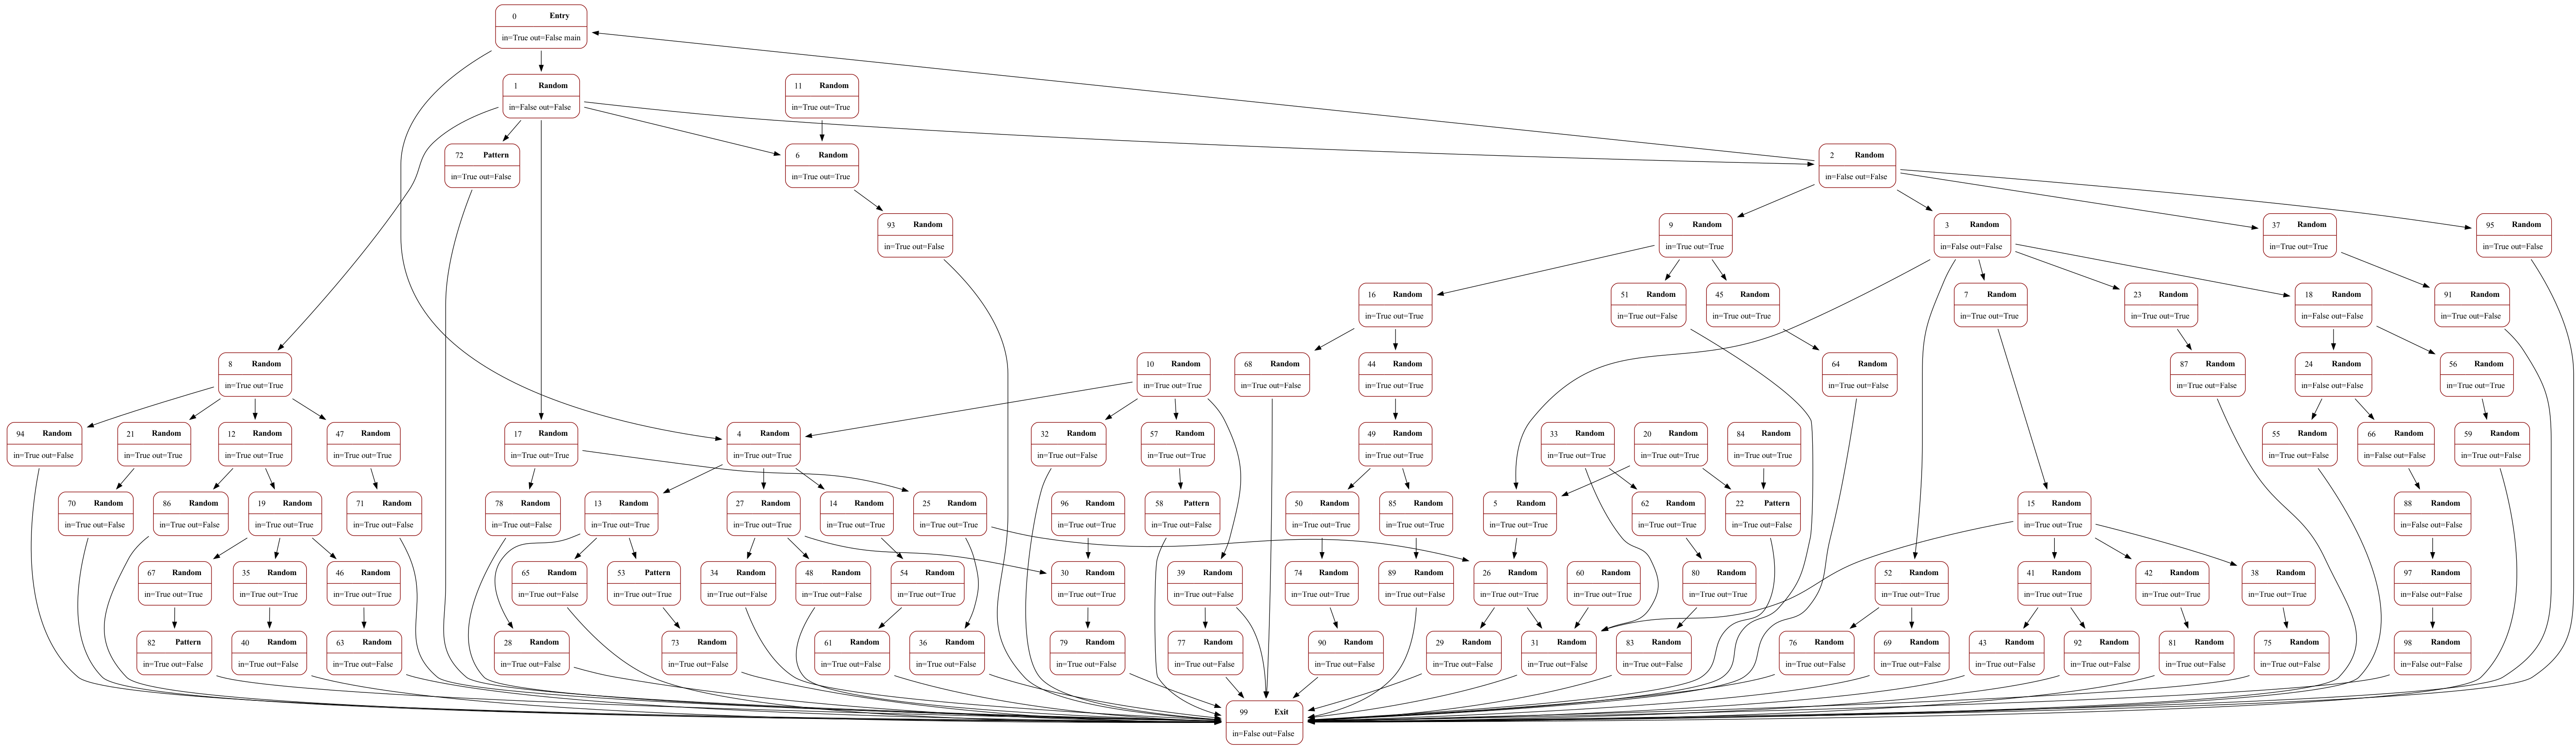

In [5]:
show_in_out(cfg1, in_dict, out_dict)  # type: ignore # noqa: F821

In [6]:
%%pyinstrument --interval=0.0001
in_dict, out_dict = reaching_ptfa(cfg1)

_     ._   __/__   _ _  _  _ _/_   Recorded: 19:31:06  Samples:  41
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.007     CPU time: 0.007
/   _/                      v4.6.2

Program: /Users/namvu/Developer/NextFire-PolyMTL/log6302a-tp3/.venv/lib/python3.12/site-packages/ipykernel_launcher.py --f=/Users/namvu/Library/Jupyter/runtime/kernel-v2-11049TugR9kCouh4f.json

0.006 <module>  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_15990/3071474652.py:1
|- 0.005 DefinitelyReachingPTFA.__call__  ptfa.py:41
|  |- 0.004 DefinitelyReachingPTFA.pre_loop_init  ptfa.py:101
|  |  |- 0.004 DefinitelyReachingPTFA.get_entry_node  ptfa.py:95
|  |  |  |- 0.002 CFG.get_type  code_analysis/Graph.py:23
|  |  |  |  |- 0.002 [self]  code_analysis/Graph.py
|  |  |  |  `- 0.001 dict.get  <built-in>
|  |  |  |- 0.001 [self]  ptfa.py
|  |  |  `- 0.000 CFG.get_node_ids  code_analysis/Graph.py:20
|  |  `- 0.001 [self]  ptfa.py
|  |- 0.000 CFG.get_node_ids  code_analysis/Graph.py:20
|  |  |- 0.000 [self]  code_analysis/Graph.py
|  |  `- 0.000 dict.keys  <built-in>
|  `- 0.000 [self]  ptfa.py
|- 0.001 Profiler.start  pyinstrument/profiler.py:103
|     [7 frames hidden]  pyinstrument
|- 0.000 [self]  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_15990/3071474652.py
`- 0.000 Profiler.stop  pyinstrument/profiler.py:138
      [4 frames hidden]  pyinstrument

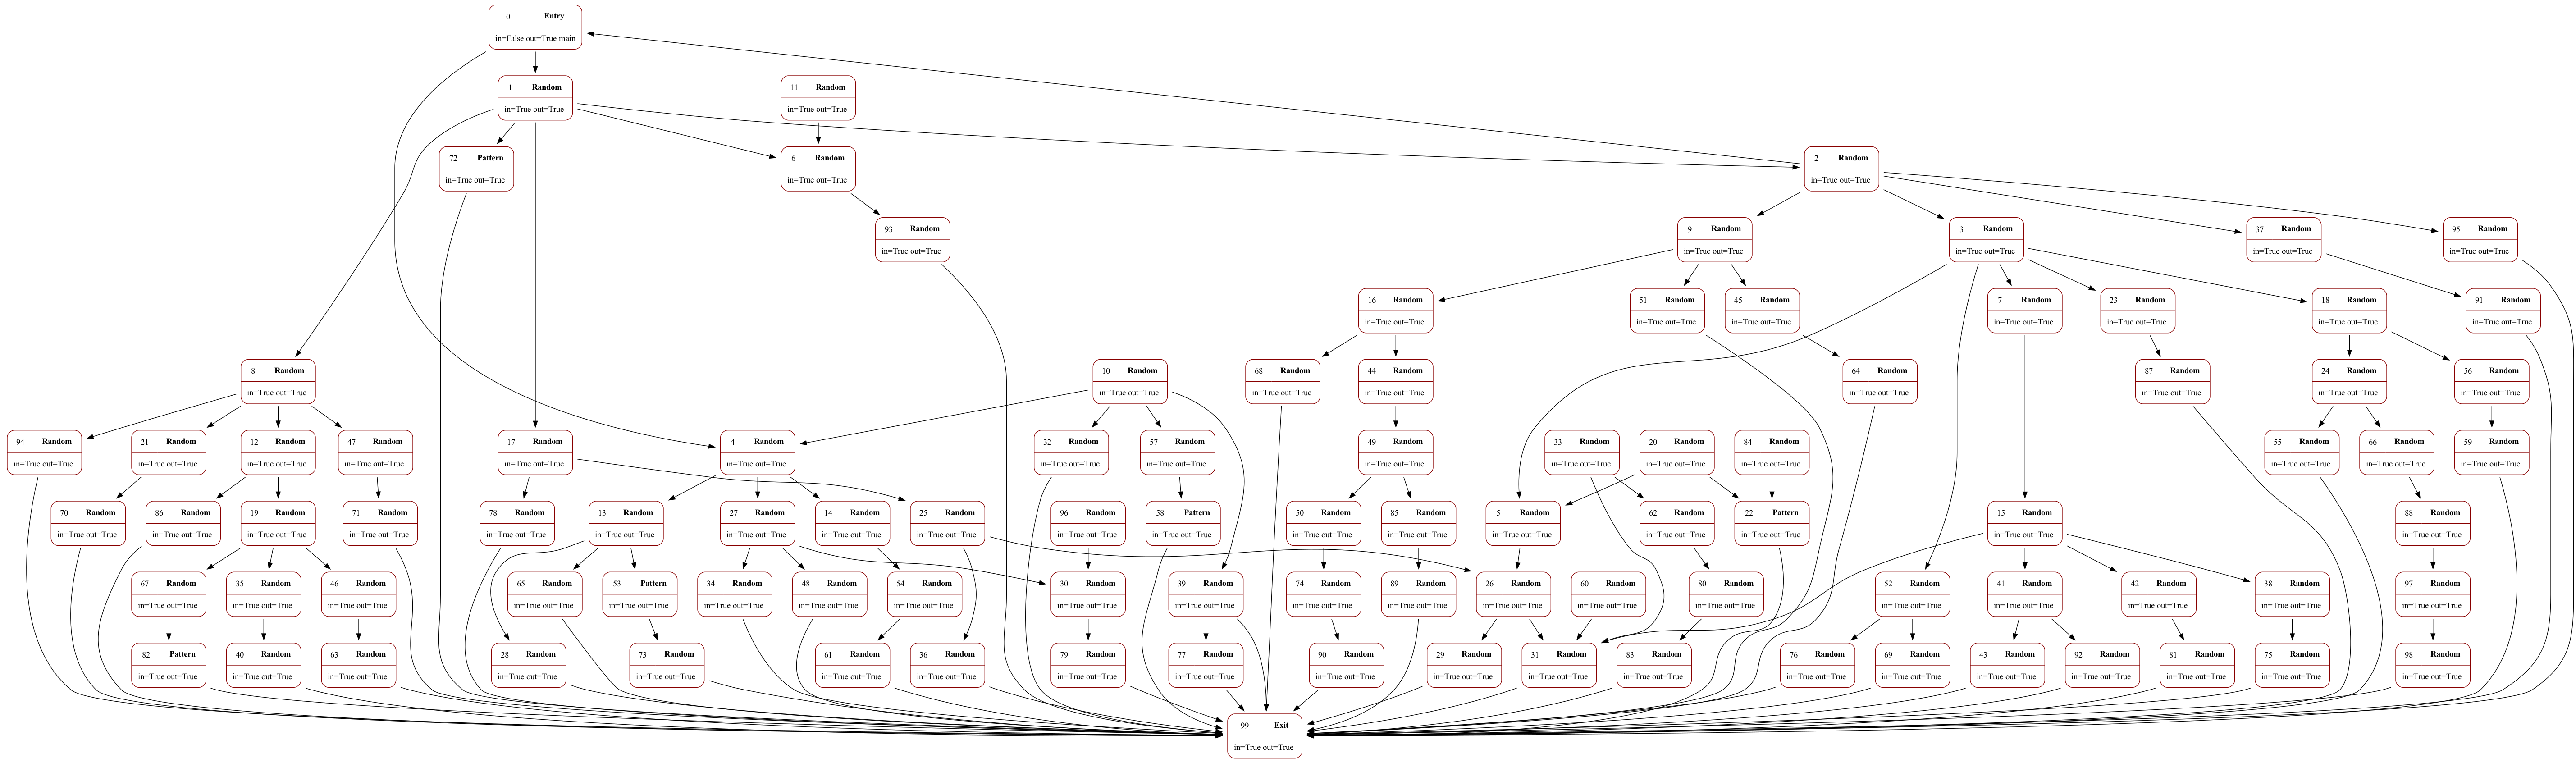

In [7]:
show_in_out(cfg1, in_dict, out_dict)  # type: ignore # noqa: F821

In [8]:
%%pyinstrument --interval=0.0001
in_dict, out_dict = reachable_ptfa(cfg2)

_     ._   __/__   _ _  _  _ _/_   Recorded: 19:31:07  Samples:  327
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.053     CPU time: 0.048
/   _/                      v4.6.2

Program: /Users/namvu/Developer/NextFire-PolyMTL/log6302a-tp3/.venv/lib/python3.12/site-packages/ipykernel_launcher.py --f=/Users/namvu/Library/Jupyter/runtime/kernel-v2-11049TugR9kCouh4f.json

0.052 <module>  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_15990/175091642.py:1
`- 0.052 DefinitelyReachablePTFA.__call__  ptfa.py:41
   |- 0.023 DefinitelyReachablePTFA.pre_loop_init  ptfa.py:74
   |  `- 0.023 DefinitelyReachablePTFA.get_exit_node  ptfa.py:68
   |     |- 0.019 CFG.get_type  code_analysis/Graph.py:23
   |     |  |- 0.012 [self]  code_analysis/Graph.py
   |     |  `- 0.007 dict.get  <built-in>
   |     `- 0.005 [self]  ptfa.py
   |- 0.013 [self]  ptfa.py
   |- 0.004 set.add  <built-in>
   |- 0.004 DefinitelyReachablePTFA.can_propagate  ptfa.py:87
   |- 0.003 DefinitelyReachablePTFA.propagate  ptfa.py:90
   `- 0.003 list.append  <built-in>

In [9]:
# show_in_out(cfg2, in_dict, out_dict)  # type: ignore # noqa: F821

In [10]:
%%pyinstrument --interval=0.0001
in_dict, out_dict = reaching_ptfa(cfg2)

_     ._   __/__   _ _  _  _ _/_   Recorded: 19:31:07  Samples:  62
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.010     CPU time: 0.010
/   _/                      v4.6.2

Program: /Users/namvu/Developer/NextFire-PolyMTL/log6302a-tp3/.venv/lib/python3.12/site-packages/ipykernel_launcher.py --f=/Users/namvu/Library/Jupyter/runtime/kernel-v2-11049TugR9kCouh4f.json

0.009 <module>  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_15990/935048700.py:1
`- 0.009 DefinitelyReachingPTFA.__call__  ptfa.py:41
   |- 0.008 DefinitelyReachingPTFA.pre_loop_init  ptfa.py:101
   |  |- 0.008 DefinitelyReachingPTFA.get_entry_node  ptfa.py:95
   |  |  |- 0.006 CFG.get_type  code_analysis/Graph.py:23
   |  |  |  |- 0.004 [self]  code_analysis/Graph.py
   |  |  |  `- 0.002 dict.get  <built-in>
   |  |  `- 0.002 [self]  ptfa.py
   |  `- 0.000 [self]  ptfa.py
   |- 0.000 CFG.get_node_ids  code_analysis/Graph.py:20
   `- 0.000 [self]  ptfa.py

In [11]:
# show_in_out(cfg2, in_dict, out_dict)  # type: ignore # noqa: F821

In [12]:
%%pyinstrument --interval=0.0001
in_dict, out_dict = reachable_ptfa(cfg3)

_     ._   __/__   _ _  _  _ _/_   Recorded: 19:31:07  Samples:  2257
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.356     CPU time: 0.304
/   _/                      v4.6.2

Program: /Users/namvu/Developer/NextFire-PolyMTL/log6302a-tp3/.venv/lib/python3.12/site-packages/ipykernel_launcher.py --f=/Users/namvu/Library/Jupyter/runtime/kernel-v2-11049TugR9kCouh4f.json

0.356 <module>  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_15990/1110603606.py:1
`- 0.355 DefinitelyReachablePTFA.__call__  ptfa.py:41
   |- 0.239 DefinitelyReachablePTFA.pre_loop_init  ptfa.py:74
   |  `- 0.238 DefinitelyReachablePTFA.get_exit_node  ptfa.py:68
   |     |- 0.176 CFG.get_type  code_analysis/Graph.py:23
   |     |  |- 0.115 [self]  code_analysis/Graph.py
   |     |  `- 0.060 dict.get  <built-in>
   |     `- 0.062 [self]  ptfa.py
   |- 0.059 [self]  ptfa.py
   |- 0.014 list.append  <built-in>
   |- 0.013 DefinitelyReachablePTFA.can_propagate  ptfa.py:87
   |- 0.013 DefinitelyReachablePTFA.propagate  ptfa.py:90
   `- 0.012 set.add  <built-in>

In [13]:
# show_in_out(cfg3, in_dict, out_dict)  # type: ignore # noqa: F821

In [14]:
%%pyinstrument --interval=0.0001
in_dict, out_dict = reaching_ptfa(cfg3)

_     ._   __/__   _ _  _  _ _/_   Recorded: 19:31:07  Samples:  1240
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.186     CPU time: 0.169
/   _/                      v4.6.2

Program: /Users/namvu/Developer/NextFire-PolyMTL/log6302a-tp3/.venv/lib/python3.12/site-packages/ipykernel_launcher.py --f=/Users/namvu/Library/Jupyter/runtime/kernel-v2-11049TugR9kCouh4f.json

0.185 <module>  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_15990/759915911.py:1
`- 0.184 DefinitelyReachingPTFA.__call__  ptfa.py:41
   |- 0.179 DefinitelyReachingPTFA.pre_loop_init  ptfa.py:101
   |  `- 0.178 DefinitelyReachingPTFA.get_entry_node  ptfa.py:95
   |     |- 0.133 CFG.get_type  code_analysis/Graph.py:23
   |     |  |- 0.085 [self]  code_analysis/Graph.py
   |     |  `- 0.048 dict.get  <built-in>
   |     `- 0.044 [self]  ptfa.py
   `- 0.004 [self]  ptfa.py

In [15]:
# show_in_out(cfg3, in_dict, out_dict)  # type: ignore # noqa: F821

In [16]:
%%pyinstrument --interval=0.0001
in_dict, out_dict = reachable_ptfa(cfg4)

_     ._   __/__   _ _  _  _ _/_   Recorded: 19:31:08  Samples:  6005
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.714     CPU time: 0.693
/   _/                      v4.6.2

Program: /Users/namvu/Developer/NextFire-PolyMTL/log6302a-tp3/.venv/lib/python3.12/site-packages/ipykernel_launcher.py --f=/Users/namvu/Library/Jupyter/runtime/kernel-v2-11049TugR9kCouh4f.json

0.714 <module>  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_15990/492505757.py:1
`- 0.712 DefinitelyReachablePTFA.__call__  ptfa.py:41
   |- 0.377 DefinitelyReachablePTFA.pre_loop_init  ptfa.py:74
   |  `- 0.376 DefinitelyReachablePTFA.get_exit_node  ptfa.py:68
   |     |- 0.257 CFG.get_type  code_analysis/Graph.py:23
   |     |  |- 0.159 [self]  code_analysis/Graph.py
   |     |  `- 0.098 dict.get  <built-in>
   |     `- 0.116 [self]  ptfa.py
   |- 0.185 [self]  ptfa.py
   |- 0.035 DefinitelyReachablePTFA.can_propagate  ptfa.py:87
   |- 0.035 list.append  <built-in>
   |- 0.033 DefinitelyReachablePTFA.propagate  ptfa.py:90
   |- 0.033 set.add  <built-in>
   `- 0.012 CFG.get_node_ids  code_analysis/Graph.py:20
      `- 0.012 [self]  code_analysis/Graph.py

In [17]:
# show_in_out(cfg4, in_dict, out_dict)  # type: ignore # noqa: F821

In [18]:
%%pyinstrument --interval=0.0001
in_dict, out_dict = reaching_ptfa(cfg4)

_     ._   __/__   _ _  _  _ _/_   Recorded: 19:31:09  Samples:  3196
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.416     CPU time: 0.390
/   _/                      v4.6.2

Program: /Users/namvu/Developer/NextFire-PolyMTL/log6302a-tp3/.venv/lib/python3.12/site-packages/ipykernel_launcher.py --f=/Users/namvu/Library/Jupyter/runtime/kernel-v2-11049TugR9kCouh4f.json

0.415 <module>  ../../../../../../var/folders/0b/wwzmhkr5781f6x79rnhyhfb80000gn/T/ipykernel_15990/3196353546.py:1
`- 0.414 DefinitelyReachingPTFA.__call__  ptfa.py:41
   |- 0.388 DefinitelyReachingPTFA.pre_loop_init  ptfa.py:101
   |  `- 0.387 DefinitelyReachingPTFA.get_entry_node  ptfa.py:95
   |     |- 0.264 CFG.get_type  code_analysis/Graph.py:23
   |     |  |- 0.167 [self]  code_analysis/Graph.py
   |     |  `- 0.097 dict.get  <built-in>
   |     `- 0.120 [self]  ptfa.py
   |- 0.022 [self]  ptfa.py
   `- 0.004 CFG.get_node_ids  code_analysis/Graph.py:20

In [19]:
# show_in_out(cfg4, in_dict, out_dict)  # type: ignore # noqa: F821

## Utilisation sur un CFG

### fopen - fclose

### Protections

In [20]:
ptfa = DefinitelyReachingPTFA(lambda cfg, nid: cfg.get_type(nid) == "use_db")

cfg = cfg_reader.read_cfg("../tp/part_2/wp-db.php.cfg.json")
in_dict, out_dict = ptfa(cfg)
show_in_out(cfg, in_dict, out_dict)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.89476 to fit


## Réparation automatique

## Justifier